# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2022/)    
## 1MS041, 2022 
&copy;2022 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Second notebook on Random variables

Lets take a look again at the spam dataset and look at our concepts there

In [1]:
from Utils import load_sms
sms_data = load_sms()
sms_data[:2]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0)]

Let X represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

To do this we can create a new random variable $Z$ which is $1$ if "free" or "prize" appears in $X$.

In [2]:
interesting_words=set(['free','prize'])
TF10 = {True: 1, False: 0}
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]

In [3]:
Z_obs[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [4]:
Y_obs = [y for x,y in sms_data]
Y_obs[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [61]:
import numpy as np
def F_X_12(x):
    TF10 = {True: 1, False: 0}
    return np.mean([TF10[(x1 <= x[0]) and (x2 <= x[1])] for x1,x2 in zip (Y_obs,Z_obs)])

This is the JDF for this problem

In [62]:
print("\t\tz2 <= 0 \tz2 <= 1")
for x1 in range(0,2):
    print("y1 <= %d \t" % x1,end='')
    for x2 in range(0,2):
        print("%.2f" % (F_X_12((x1,x2))),end='\t\t')
    print('\n')

		z2 <= 0 	z2 <= 1
y1 <= 0 	0.86		0.87		

y1 <= 1 	0.96		1.00		



In [7]:
F_X_12((1,0))

0.9551328068916008

In [8]:
F_X_12((0,0)) == F_X_12((0,1))*F_X_12((1,0))

False

In [9]:
F_X_12((0,1))*F_X_12((1,0))

0.8270846721557743

In [10]:
# Are they indepdentent? If so, then the JDF is just the product of the 
# DFs for Y and Z, but
0.865936826992103*0.955132806891601

0.827084672155774

Which is not 0.858, so they are not independent. So lets try to estimate the probability that $Y=1$ given that $Z = 1$. Lets again do that by filtering

In [11]:
np.mean([y for z,y in zip(Z_obs,Y_obs) if z == 1])

0.812

Compare that with the marginal probability of $Y = 1$, which is according to our JDF 1-0.866 = 0.134

In [12]:
# Or we can just compute it directly
np.mean(Y_obs)

0.13406317300789664

What we see from this is that knowing that the words "free" or "prize" appeared in the sms text, we are much more certain that it is a spam. We also see that looking directly at the JDF this can be hard to see, although it is equivalent.

## Moments etc

In [13]:
import numpy as np
x = np.random.normal(size=100)

In [14]:
x

array([-1.60134302, -1.28906197,  1.93971397,  2.52281858,  0.53953384,
       -2.7645476 ,  1.25492116, -0.55057419,  1.24821179,  0.28964304,
       -0.60443248, -1.36060623,  1.651227  , -1.15519394,  0.1606454 ,
       -0.38778905,  0.37239099,  0.60904312, -0.99858765, -1.14558265,
        1.9734236 ,  0.38309785,  0.34704152,  1.13627003, -0.51590922,
       -1.71574122,  0.7838328 ,  0.79541101, -1.25666358, -1.03152676,
       -0.39911225, -0.1228037 ,  0.62649672,  0.29730338, -0.3338335 ,
        0.5110353 , -1.67912628, -0.15151192, -1.71723157,  0.58113864,
        0.56884112,  0.74043449,  0.30981541, -0.58027176, -0.39066055,
        1.57633852, -0.90937859, -1.09338787, -1.54404398, -0.27893451,
       -0.34842388,  0.29619616, -0.95360943, -0.52032863,  0.91181005,
        0.40804382,  0.38008066,  0.03883902, -1.08265284, -0.80542249,
       -0.37878079, -0.63552627, -0.35592166, -0.03175781,  0.05341598,
        0.76122113,  0.65130315,  0.92696214, -0.28498709, -0.41

## Sample mean

In [15]:
np.mean(x)

-0.08953651075137653

## Sample variance

In [16]:
np.var(x)

0.9428692819847428

Or by doing it yourself

In [17]:
mu = np.mean(x)
np.mean(np.power(x-mu,2))

0.9428692819847428

Higher moments, we can use `scipy`

In [18]:
from scipy.stats import skew, kurtosis

In [19]:
skew(x)

-0.023284809884430522

In [20]:
kurtosis(x,fisher=False)

2.8774910601892647

## Moments and tail behavior

In [21]:
def standardize(data):
    mean = np.mean(data)
    std = np.sqrt(np.var(data))
    return (data-mean)/std

(-3.0, 5.0)

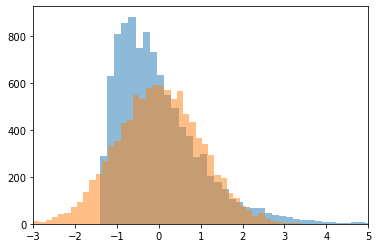

In [22]:
import numpy as np
chi2 = np.random.chisquare(4,size=10000)
normal = np.random.normal(size=10000)
import matplotlib.pyplot as plt
_=plt.hist(standardize(chi2),bins=50,alpha=0.5)
_=plt.hist(standardize(normal),bins=50,alpha=0.5)
plt.xlim(-3,5)

In [23]:
from scipy.stats import skew, kurtosis
def print_basic_stats(data):
    print("mean: %.2f\tstd: %.2f\tskew: %.2f\tkurtosis: %.2f" % (np.mean(data),np.std(data),skew(data),kurtosis(data,fisher=False)))

In [24]:
print_basic_stats(normal)

mean: -0.01	std: 1.00	skew: -0.02	kurtosis: 2.96


In [25]:
print_basic_stats(chi2)

mean: 4.04	std: 2.84	skew: 1.37	kurtosis: 5.70


In [40]:
print_basic_stats(standardize(np.sqrt(chi2)))

mean: -0.00	std: 1.00	skew: 0.38	kurtosis: 3.01


In [43]:
np.mean(np.power(normal,3)) # Skewness

-0.04151059068430487

In [54]:
np.mean(np.power(normal,9)) 

-75.80657751441144

## Transformations of random variables

Consider a Binomial random variable

In [76]:
n = 10
p = 0.5
#x = np.random.binomial(n,p,size=1000)
x = np.random.uniform(0,1, size=1000)
x

array([4.18626211e-02, 9.27291786e-01, 4.19173812e-02, 9.71242216e-01,
       6.22254726e-02, 1.45127434e-01, 3.35169855e-01, 5.88070183e-01,
       4.30628298e-01, 3.65933115e-01, 4.63170116e-01, 8.16370580e-01,
       8.52364549e-01, 6.50019601e-01, 5.29050573e-02, 5.18452439e-01,
       7.29889222e-01, 9.28344110e-01, 5.96989481e-01, 6.69902026e-01,
       6.74491308e-01, 6.94797507e-01, 8.46389319e-01, 3.62168803e-01,
       8.71569534e-01, 1.06288755e-01, 9.22716720e-01, 9.85548190e-01,
       3.94981639e-01, 8.62592968e-02, 2.04274489e-01, 9.90470501e-01,
       6.68102195e-02, 5.40406325e-01, 4.24513714e-01, 7.55414132e-02,
       4.41907511e-01, 7.01160649e-01, 6.30088389e-01, 6.12577666e-01,
       6.22248609e-01, 6.74789804e-01, 2.90745711e-01, 7.61277878e-01,
       5.39796753e-01, 9.63515149e-01, 7.81958855e-01, 7.77543754e-02,
       1.54280132e-01, 4.69497161e-01, 8.73310160e-01, 1.42361584e-01,
       1.38497591e-01, 3.61269878e-01, 5.90203180e-01, 5.55041562e-01,
      

Lets plot the empirical density

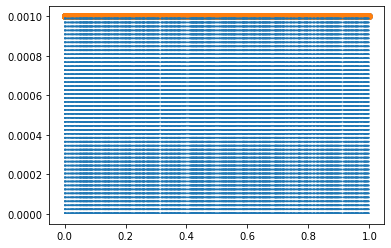

In [77]:
from Utils import makeEMF,makeEDF,plotEDF,plotEMF
plotEMF(makeEMF(x))

If we had the function $g(x) = \sin(x/3)$

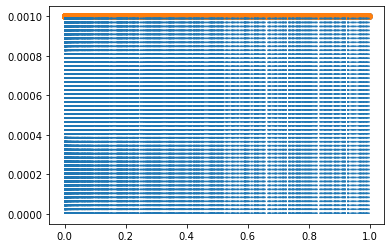

In [78]:
plotEMF(makeEMF(np.power(x, 2)))

Text(0.5, 1.0, 'Correct Plot:\nBut uses to many lines to unpack li')

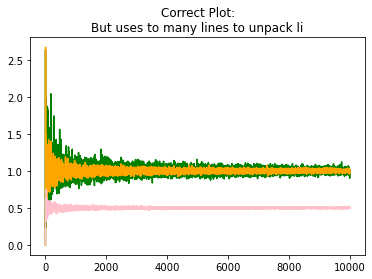

In [122]:
#plotEDF(makeEDF(np.power(x, 2)))

mean_x1 = []
mean_x1_10 = []
mean_x2 = []
mean_x3 = []
x3_var = []
x4_var = []
mean_x3_3 = []
mean_x3_4 = []
mean_x4 = []
num = []
for n in range(1,10000):
    num.append(n)
    x1 = np.random.binomial(1,p=0.5,size=n)
    x2 = np.random.uniform(0,1, size=n)
    x3 = np.random.normal(size=n)
    x4 = np.random.exponential(size=n)
    mean_x1_10.append(np.mean(np.power(x1, 10)))
    mean_x1.append(np.mean(np.power(x1, 1)))
    mean_x2.append(np.mean(x2))
    mean_x3_3.append(np.mean(np.power(x3, 3)))
    mean_x3_4.append(np.mean(np.power(x3, 3)))
    x3_var.append(np.var(x3))
    x4_var.append(np.var(x4))
    mean_x3.append(np.mean(x3))
    mean_x4.append(np.mean(x4))
    
#plt.plot(num, mean_x3_4, 'b')
#plt.plot(num, mean_x3_3, 'r')
#plt.plot(num, mean_x4, 'y')
#plt.plot(num, mean_x3, 'g')
plt.plot(num, x4_var, 'g')
plt.plot(num, x3_var, 'orange')

plt.plot(num, mean_x1_10, 'pink')

plt.title('Correct Plot:\nBut uses to many lines to unpack li')   
    
    

Can we compute this thing?
What is $\sin^{[-1]}$?

Since $X$ is discrete, we can check what $\mathbb{Y}$ is, since $\mathbb{X}=\{0,1,\ldots,10\}$.

In [33]:
Y_space = np.sort(np.sin(np.arange(0,11)))
sin_inv = dict(zip(np.sin(np.arange(0,11)),np.arange(0,11)))

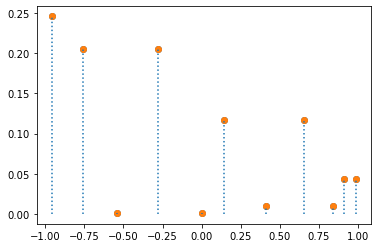

In [64]:
from scipy.special import binom as binomial
plotEMF([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space])

In [65]:
plotEDF(emfToEdf([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space]))

NameError: name 'emfToEdf' is not defined